In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt
import os
os.getcwd()

'/home/zhizhi/FTLE'

In [21]:
### create flow domain 
# there are same number of Lagrangian and Eulerian grid points (Nx, Ny)
Lx, Ly = (2, 2)
Nx, Ny = (150, 150)
x = np.linspace(-Lx,Lx,Nx)
y = np.linspace(-Ly,Ly,Ny)
X, Y = np.meshgrid(x,y)
dist = np.sqrt(X**2 + Y**2)
dx = 2*Lx/(Nx-1)
dy = dx

t0 = 0
tf = 30
St = 0.2
R = 0
a = 1
W = 0.2


### open and load flow map datasets
file_path = f'hills_i_W_{W}_St{St}_R{R}_tf{tf}.npy'
if os.path.exists(file_path):
    flow_map = np.load(file_path, allow_pickle=True)
else:
    raise FileNotFoundError(f"The file '{file_path}' does not exist.")



In [22]:
Xf = flow_map[:,2]
Yf = flow_map[:,3]

# Xf_on_grid = [np.min(abs())]
# Xf_on_grid = np.asarray([x[np.argmin(abs(Xf[i] - x))] for i in range(len(Xf))], dtype=float)
# Yf_on_grid = np.asarray([y[np.argmin(abs(Yf[i] - x))] for i in range(len(Yf))], dtype=float)

# note that these two arrays store the INDEX of x, y coordinates
Xf_on_grid = np.asarray([np.argmin(abs(Xf[i] - x)) for i in range(len(Xf))], dtype=int)
Yf_on_grid = np.asarray([np.argmin(abs(Yf[i] - x)) for i in range(len(Yf))], dtype=int)
XYf_on_grid = np.column_stack((Xf_on_grid, Yf_on_grid))


In [23]:
# build a table (dict) to store counts of each point --> concentration on each grid
grid_points = np.column_stack((X.ravel(), Y.ravel()))

concentration = {}

for row in XYf_on_grid:
    row = tuple(row)
    if row in concentration:
        concentration[row] += 1
    else:
        concentration[row] = 1

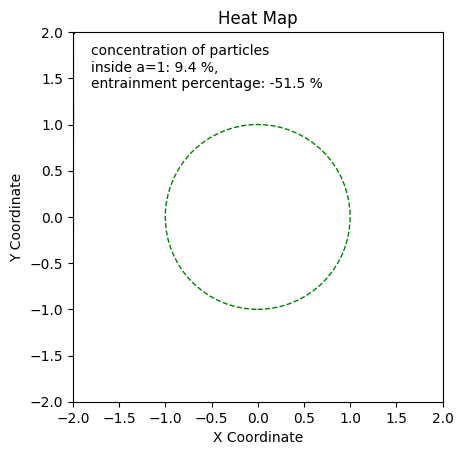

In [24]:
# visualise concentration over the grid
heat_map = np.zeros((Ny, Nx))

coordinates, intensities = zip(*concentration.items())
x_con, y_con = zip(*coordinates)

# Fill the heat_map array with the intensities based on the coordinates
for i in range(len(coordinates)):
        heat_map[y_con[i], x_con[i]] = intensities[i]

heat_map_norm = heat_map/np.sum(heat_map>0)
# heat_map = heat_map > 0.5
# Create a heat map plot

# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()
plt.imshow(heat_map_norm[::-1, :], extent=[x[0],x[-1],y[0],y[-1]], origin='lower', cmap=reversed_map , interpolation='nearest')
# Define the center and radius of the circle
circle_center = (0, 0)  # (x, y) coordinates of the center
circle_radius = a 

# Create a Circle patch
circle = plt.Circle(circle_center, circle_radius, linestyle='dashed', color='green', fill=False)

# Add the Circle patch to the plot
plt.gca().add_patch(circle)

# plt.colorbar()
plt.title('Heat Map')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.text(-1.8, 1.4, f'concentration of particles\ninside a={a}'+': '+f'{100*sum(heat_map[dist<=a])/np.sum(heat_map):.1f} %,\n\
entrainment percentage: {100*(sum(heat_map[dist<=a])-np.sum(dist<a))/np.sum(dist<a):.1f} %')
plt.show()